### Insert useful libraries 

In [94]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import datetime as dt

## Explore data

**What data we have to use:**

- interactions_train.csv: **698,901** rows dataset, 97% of the whole data set. Columns:
  - 'user_id', 
  - 'recipe_id' 
  - 'date' 
  - 'rating' 
  - 'u'
  - 'i'
- interactions_test.csv: **12,455** rows dataset, 1.7% of the whole data set. Columns:
  - 'user_id'
  - 'recipe_id'
  - 'date' 
  - 'rating'
  - 'u'
  - 'i' 
- interactions_validate.csv: **7,023** rows dataset, 0.9% of the whole data set. Columns:
  - 'user_id'
  - 'recipe_id'
  - 'date'
  - 'rating'
  - 'u'
  - 'i'
- RAW_interations.csv: **1,132,367** rows dataset. Raw data of users rating and order info. Columns: 
  - 'user_id'
  - 'recipe_id'
  - 'date'
  - 'rating'
  - 'reviews' 
- PP_users.csv: **25076** rows dataset. Token data of each **UNIQUE** user's orders and rating information. Columns:
  - 'u'
  - 'techniques'
  - 'items'
  - 'n_items'
  - 'ratings'
  - 'n_ratings' 
- RAW_recipes.csv: **231,637** rows dataset. This is a raw data about the recipes. Columns: 
  - 'name'
  - 'id'
  - 'minutes'
  - 'contributor_id'
  - 'submitted'
  - 'tags'
  - 'nutrition'
  - 'n_steps'
  - 'steps'
  - 'description'
  - 'ingredients'
  - 'n_ingredients' 
- PP_recipes.csv: **178,265** rows dataset. Has more or less the same information as 'RAW_recipes" data but in tokens. It has tokenized all the words into numbers. Columns:
  - 'id'
  - 'i'
  - 'name_tokens'
  - 'ingredient_tokens'
  - 'steps_tokens'
  - 'techniques'
  - 'calorie_level'
  - 'ingredient_ids' 

**Data explanation:**

-**'u'**: the identifier of the users, like user_id, but in 'PP_user' dataset has very important use, because 'u' is the unique value for the users_id. 

-**'i'**: the identifier of recipe, like recipe_id, but specially use for tokenizing.

-**items**: the recipes which users have oreder, but used 'i'


In [95]:
test = pd.read_csv('interactions_test.csv')
test.head()

,user_id,recipe_id,date,rating,u,i
0,8937,44551,2005-12-23,4.0,2,173538
1,56680,126118,2006-10-07,4.0,16,177847
2,349752,219596,2008-04-12,0.0,26,89896
3,628951,82783,2007-11-13,2.0,45,172637
4,92816,435013,2013-07-31,3.0,52,177935


In [96]:
test.shape

(12455, 6)

In [97]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12455 entries, 0 to 12454
Data columns (total 6 columns):
user_id      12455 non-null int64
recipe_id    12455 non-null int64
date         12455 non-null object
rating       12455 non-null float64
u            12455 non-null int64
i            12455 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 583.9+ KB


In [98]:
test.shape

(12455, 6)

In [99]:
train = pd.read_csv('interactions_train.csv')
train.shape

(698901, 6)

In [100]:
validate = pd.read_csv('interactions_validation.csv')
validate.shape

(7023, 6)

In [101]:
df = pd.read_csv('RAW_interactions.csv')
df.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [102]:
df.shape

(1132367, 5)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
user_id      1132367 non-null int64
recipe_id    1132367 non-null int64
date         1132367 non-null object
rating       1132367 non-null int64
review       1132198 non-null object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


In [104]:
df1 = pd.read_csv('PP_users.csv')
df1.head(2)

,u,techniques,items,n_items,ratings,n_ratings
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39


In [105]:
df1.shape

(25076, 6)

In [106]:
df1.describe()

,u,n_items,n_ratings
count,25076.000000,25076.000000,25076.000000
mean,12537.500000,27.871311,27.871311
std,7238.962011,122.729039,122.729039
min,0.000000,2.000000,2.000000
25%,6268.750000,3.000000,3.000000
50%,12537.500000,6.000000,6.000000
75%,18806.250000,16.000000,16.000000
max,25075.000000,6437.000000,6437.000000


In [107]:
df1['u'].duplicated().value_counts()

False    25076
Name: u, dtype: int64

In [108]:
df2 = pd.read_csv('RAW_recipes.csv')
df2.head(2)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6


In [109]:
df2.shape

(231637, 12)

In [110]:
df3 = pd.read_csv('PP_recipes.csv')
df3.head(2)

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."


In [111]:
df3.shape

(178265, 8)

In [112]:
# Have a simple check on whether the tokens correspond with the words, one example from the id 146223, the 2 row of the df1. 
df3['techniques'].iloc[1]
# as the result, there are 12 tokens in ingredient_token column of id 146223

'[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]'

In [113]:
# Lets have a look at table df, see what ingredients are there, and how many are
lis = df2[(df2['id'] == 146223)]['ingredients']
[print(x) for x in lis] 
# there are also 12 ingredients, it corresponde with the tokens. If we look at the tokens, it is actually one token
# corresponde with one single word

['flour', 'oats', 'brown sugar', 'pecans', 'butter', 'eggs', 'solid pack pumpkin', 'sweetened condensed milk', 'cinnamon', 'ginger', 'nutmeg', 'salt']


[None]

## Clean and Tidy Data

**Possible data problems:**

- Missing data
<br>
- Unformatted data
<br>
- Data format incorrect
<br>
- Duplicated data
<br>
- Too many dataset can also lead misunderstanding

### Merge data

In [114]:
# Join train, test and validate data together
df_join = test.append(train)
df_join = df_join.append(validate)
df_join.shape

(718379, 6)

In [115]:
# Join the df_join table together with RAW_interactions table
df_review = df_join.merge(df, on = ['user_id', 'recipe_id', 'date','rating'], how = 'outer')
df_review.head(2)

,user_id,recipe_id,date,rating,u,i,review
0,8937,44551,2005-12-23,4.0,2.0,173538.0,I made this and took it to several holiday fun...
1,56680,126118,2006-10-07,4.0,16.0,177847.0,"This was really great, directions are right on..."


In [116]:
df_review.shape

(1132367, 7)

In [118]:
# Join 2 previous tables into one table, I will choose to outer join table df to df1. So there will be 53372 ids without tokens
recipe_df = df2.merge(df3, on ='id', how = 'outer')
recipe_df.head(2)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,145702.0,"[40480, 1943, 6987, 12187, 4423, 23841, 12432,...","[[4423, 23841], [12432, 29471, 484], [5811, 16...","[40480, 40482, 925, 246, 2650, 488, 10744, 556...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,"[7933, 4694, 4795, 3723, 840, 5006, 6270]"
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,33090.0,"[40480, 246, 1378, 1685, 3511, 6856, 40481]","[[3572, 6856, 19093], [17027, 15774], [6812], ...","[40480, 40482, 729, 2525, 10906, 485, 44, 1035...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,"[5481, 6324, 2499, 4717, 6276, 1170]"


### Incorrect data format

**Date data**

There are two tables with date data, one is the df_join table(which I joined train, test and validate data together). Another table with data is the df from 'RAW_interations' data.

**String data**

IDs should be inn string instead of integer or float. So **user_id, recip_id, u and i** all should be in string format.

In [119]:
# Firstly look at convert the date of df_join into a correct format
df_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132367 entries, 0 to 1132366
Data columns (total 7 columns):
user_id      1132367 non-null int64
recipe_id    1132367 non-null int64
date         1132367 non-null object
rating       1132367 non-null float64
u            718379 non-null float64
i            718379 non-null float64
review       1132198 non-null object
dtypes: float64(3), int64(2), object(2)
memory usage: 69.1+ MB


In [120]:
df_review['date'] = pd.to_datetime(df_review['date'].astype(str), format='%Y-%m-%d')

In [121]:
print(df_join['date'].max())
print(df_join['date'].min())

2018-12-19
2000-02-25


In [124]:
df_review[['user_id','recipe_id', 'u','i']] = df_review[['user_id','recipe_id', 'u','i']].astype(str)
df_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132367 entries, 0 to 1132366
Data columns (total 7 columns):
user_id      1132367 non-null object
recipe_id    1132367 non-null object
date         1132367 non-null datetime64[ns]
rating       1132367 non-null float64
u            1132367 non-null object
i            1132367 non-null object
review       1132198 non-null object
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 69.1+ MB


### Missing data

#### Missing data in columns

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. I will need to identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data. Besides, I will plot a histogram graph to better visualize the columns with missing data.

In [126]:
# Create one function to check the missing data per each column and also the percentage of the missing data
def assess_missing_data(df):
    '''
    A function to find out the missing data and its statistic information
    
    input:
    df: the data frame
    
    output:
    df_stats: the statistic information of missing column, will be missing value count and
    missing value percentage
    '''
    
    rec = []
    for column_name in df.columns:
        miss_count = df[column_name].isnull().sum(axis=0)
        miss_percent=miss_count/df.shape[0]
        rec.append([column_name,miss_count,miss_percent*100])
        df_stats = pd.DataFrame.from_records(rec, columns = ['column name', 
                                                             'missing_count','missing_percentage'])  
        df_stats = df_stats.sort_values('missing_percentage',axis=0, ascending = False )
    return df_stats

In [127]:
# df_review data
assess_missing_data(df_review)

,column name,missing_count,missing_percentage
6,review,169,0.014924
0,user_id,0,0.000000
1,recipe_id,0,0.000000
2,date,0,0.000000
3,rating,0,0.000000
4,u,0,0.000000
5,i,0,0.000000


#### Missing data in rows

Now I will perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. I will again plot a visual graph to let you see the distribution of rows with missing data. But since we are not able to show all the rows, so I will not use the function I created from the previous part.

Text(0.5, 0, 'number of missing data')

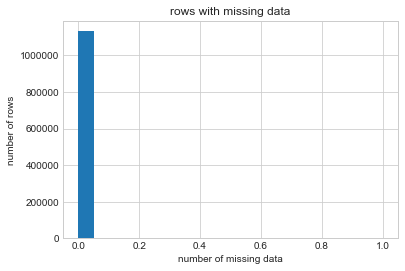

In [132]:
df_review.isnull().sum(axis=1).hist(bins = 20)
plt.title('rows with missing data')
plt.ylabel('number of rows')
plt.xlabel('number of missing data')

Quite clean dataset, there is only review has 169 null data, we can fill it with 0.

In [139]:
df_review = df_review.fillna(0)
df_review.isnull().sum()

user_id      0
recipe_id    0
date         0
rating       0
u            0
i            0
review       0
dtype: int64

## Analyze Data

In [ ]:

def get_top_articles(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''
    recipe_by_user = df.groupby('recep')['user_id'].count()
    top_articles_id = article_by_user.sort_values(ascending=False).index[:n]
    
    top_articles =[]
    
    for i in range(n):
        top_title = df[df.article_id == top_articles_id[i]]['title'].iloc[0]
        top_articles.append(top_title)
    
    return top_articles # Return the top article titles from df (not df_content)